In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from openai import OpenAI
from typing import List, Optional

client = OpenAI()

def get_embedding(text: str, model="text-embedding-3-small", **kwargs) -> List[float]:
  text = text.replace("\n", " ")
  response = client.embeddings.create(input=[text], model=model, **kwargs)
  return response.data[0].embedding

In [ ]:
i_list = []
for i in text.split("\n"):
  i = i[11:].replace("　","")
  i_list.append(i[:(i.find('['))])
print(len(i_list))
i_dict = {"text": i_list}
df = pd.DataFrame(i_dict)
print(df)

49
                                                 text
0                       日キリバスで中国警察が活動、犯罪データベース作成など支援 
1                         日ロシアの核戦力、95％が近代化済み＝プーチン大統領 
2                                   為ドル・円は底堅い、ユーロは軟調 
3                         為ドル円、一時150.71円まで上昇 昨日高値上抜け 
4                     日ＥＣＢ23年決算、過去最大79億ユーロの損失 利払い膨らむ 
5                           為東京外国為替市場概況・17時 ドル円、もみ合い 
6                           為ドル・円は小じっかり、米利下げ時期後退の観測で 
7                        日中国、辰年で出生数増加 人口減少緩和も＝現地メディア 
8                          日アルメニア、ロシア主導軍事同盟への参加凍結＝首相 
9                    為クロス円、堅調 米株先物高などでユーロ円は163.09円まで 
10                      日メキシコＧＤＰ、第4四半期0.1％増に鈍化 利下げ観測 
11                           為東京外国為替市場概況・15時 ドル円、小幅高 
12                  日ルネサス、仏シーカンス買収の合意書を解除－株式公開買い付け中止 
13                為「ドル・円は伸び悩みか、米利下げ時期後ずれも日本の為替介入に警戒」 
14                     日ＦＲＢ理事発言で利下げ時期後ずれ、ＧＳは5月予想取り下げ 
15                          日中国1月新築住宅価格、政策支援でも下落傾向続く 
16                           為ドル円、底堅い 150.50円台まで買い戻し 
17                  日利下げ急

In [ ]:
embedding_model = "text-embedding-3-large"
df["embedding"] = df["text"].apply(lambda x: get_embedding(x, model=embedding_model))
print(df)

                                                 text  \
0                       日キリバスで中国警察が活動、犯罪データベース作成など支援    
1                         日ロシアの核戦力、95％が近代化済み＝プーチン大統領    
2                                   為ドル・円は底堅い、ユーロは軟調    
3                         為ドル円、一時150.71円まで上昇 昨日高値上抜け    
4                     日ＥＣＢ23年決算、過去最大79億ユーロの損失 利払い膨らむ    
5                           為東京外国為替市場概況・17時 ドル円、もみ合い    
6                           為ドル・円は小じっかり、米利下げ時期後退の観測で    
7                        日中国、辰年で出生数増加 人口減少緩和も＝現地メディア    
8                          日アルメニア、ロシア主導軍事同盟への参加凍結＝首相    
9                    為クロス円、堅調 米株先物高などでユーロ円は163.09円まで    
10                      日メキシコＧＤＰ、第4四半期0.1％増に鈍化 利下げ観測    
11                           為東京外国為替市場概況・15時 ドル円、小幅高    
12                  日ルネサス、仏シーカンス買収の合意書を解除－株式公開買い付け中止    
13                為「ドル・円は伸び悩みか、米利下げ時期後ずれも日本の為替介入に警戒」    
14                     日ＦＲＢ理事発言で利下げ時期後ずれ、ＧＳは5月予想取り下げ    
15                          日中国1月新築住宅価格、政策支援でも下落傾向続く    
16                           為ド

In [ ]:
import numpy as np

matrix = np.vstack(df.embedding.values)
matrix.shape

(49, 3072)

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
df["Cluster"] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-40-d137097df0fc>:16: RuntimeWarning: Mean of empty slice.
  avg_x = xs.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-40-d137097df0fc>:17: RuntimeWarning: Mean of empty slice.
  avg_y = ys.mean()


Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

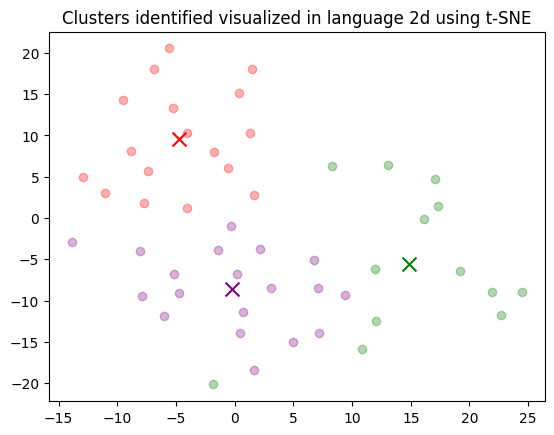

In [ ]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=100)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red"]):
    xs = np.array(x)[df.Cluster == category]
    ys = np.array(y)[df.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")

In [ ]:
rev_per_cluster = 10
for j in range(n_clusters):
  print(j)
  sample_cluster_rows = df[df.Cluster == j]
  for k in range(rev_per_cluster):
    print(sample_cluster_rows.text.values[k])

0
為ドル・円は底堅い、ユーロは軟調 
為ドル円、一時150.71円まで上昇 昨日高値上抜け 
為東京外国為替市場概況・17時 ドル円、もみ合い 
為ドル・円は小じっかり、米利下げ時期後退の観測で 
為クロス円、堅調 米株先物高などでユーロ円は163.09円まで 
為東京外国為替市場概況・15時 ドル円、小幅高 
為「ドル・円は伸び悩みか、米利下げ時期後ずれも日本の為替介入に警戒」 
為ドル円、底堅い 150.50円台まで買い戻し 
為ユーロドル、1.0800ドルの攻防に要警戒か 
為ドル・円は弱含み、中国・香港株にらみ 
1
日キリバスで中国警察が活動、犯罪データベース作成など支援 
日ロシアの核戦力、95％が近代化済み＝プーチン大統領 
日ＥＣＢ23年決算、過去最大79億ユーロの損失 利払い膨らむ 
日中国、辰年で出生数増加 人口減少緩和も＝現地メディア 
日アルメニア、ロシア主導軍事同盟への参加凍結＝首相 
日メキシコＧＤＰ、第4四半期0.1％増に鈍化 利下げ観測 
日ＦＲＢ理事発言で利下げ時期後ずれ、ＧＳは5月予想取り下げ 
日中国1月新築住宅価格、政策支援でも下落傾向続く 
日利下げ急がず、2カ月は物価統計確認する必要＝ウォラーＦＲＢ理事 
日米下院特別委、独ＶＷに中国・新疆撤退を要請 
2
日ルネサス、仏シーカンス買収の合意書を解除－株式公開買い付け中止 
日米国初の大型沖合風力発電、3万世帯に送電 さらに能力拡大へ 
日ＪＥＲＡ、豪ガス田権益を約14億ドルでウッドサイドから取得へ 
日米企業の無人宇宙船が月面に着陸、民間で世界初 
日オープンＡＩのアルトマン氏、ＩＰＯ目指すレディット大株主と判明 
22日のNY市場は大幅上昇 - 最新株式ニュース 
米米国株式市場＝Ｓ＆Ｐとダウ最高値、好業績のエヌビディアが急伸 
NYダウ 初めて3万9000ドル超える 史上最高値を更新 
債NY債券、長期債横ばい 10年債利回り4.32% 米ハイテク株高は重荷 
日【米国市況】株価指数は最高値､ＡＩ旋風が地球一周－ドル150円台半ば 
